In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics

## EDA (Exploratory Data Analysis)

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

<AxesSubplot:>

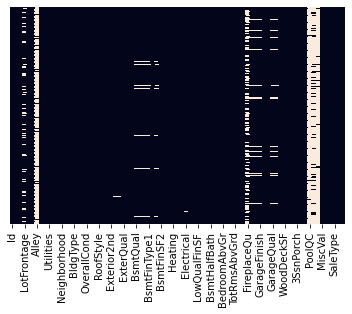

In [6]:
# Plotting heat map for understanding null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [7]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data cleaning

In [9]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

df.drop(['Alley'],axis=1,inplace=True)

df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

df.drop(['GarageYrBlt'],axis=1,inplace=True)

df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

df.drop(['Id'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [11]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<AxesSubplot:>

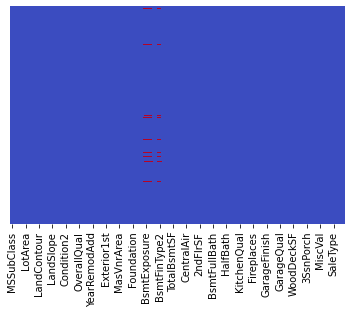

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [13]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

<AxesSubplot:>

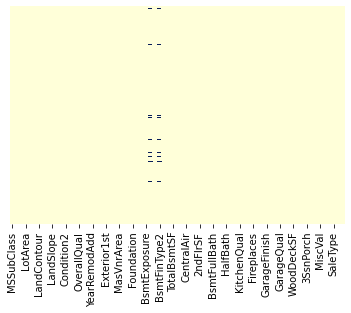

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [15]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(1422, 75)

In [18]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### One hot encoding

In [19]:
# HAndle Categorical Features 

columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']
len(columns)

39

In [20]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
#         print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [21]:
final_df = df.copy()
Y = df['SalePrice']
X = df.drop(['SalePrice'], axis=1)

In [22]:
X = category_onehot_multcols(columns)
# final_df = X
X=X.loc[:,~X.columns.duplicated()]

### Train and Test sets

TRAIN TEST SPLIT 70-30

In [23]:
x_train, x_test, y_train, y_test = tts(X, Y, test_size = 0.3, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(995, 173)
(427, 173)
(995,)
(427,)


# GBDT

In [24]:
classifier=xgboost.XGBRegressor()
classifier.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
# Hyper Parameter Optimization
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [26]:
random_cv.fit(x_train,y_train)
random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   20.2s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  8.3min finished


[18:20:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.75, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
regressor_gbdt = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=1, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, subsample=1)
regressor_gbdt.fit(x_train,y_train)

# Saving as pickle file
filename = 'finalized_model.pk1'
pickle.dump(regressor_gbdt, open(filename,'wb'))

In [28]:
y_pred_gbdt = regressor_gbdt.predict(x_test)

In [29]:
y_pred_gbdt

array([184693.11 , 119041.68 , 136041.55 , 382490.84 , 161377.72 ,
       118803.54 , 274432.84 , 143384.42 , 189753.47 , 160953.94 ,
       385494.4  , 235714.52 , 309631.7  , 143037.6  , 224902.8  ,
       148965.86 , 435516.62 , 185535.27 , 249561.11 ,  94762.59 ,
       160201.38 , 165632.52 , 130687.94 , 128984.38 , 180311.88 ,
       163991.94 , 184606.88 , 115779.18 , 213988.53 , 169640.   ,
       140432.02 , 229443.48 , 155684.56 , 140457.92 , 136048.81 ,
       309887.9  , 238958.5  , 154144.05 , 119859.56 , 250445.05 ,
       108543.66 , 267659.75 ,  76355.234,  37933.938, 371789.94 ,
       154610.44 , 124603.164, 192858.81 , 354366.3  , 155400.69 ,
       173405.61 , 315867.56 , 184129.5  ,  66592.86 , 155792.9  ,
       120125.734,  60202.184, 225899.44 ,  99959.99 , 135851.7  ,
        87523.82 , 124771.766, 192864.08 , 250204.88 , 169420.3  ,
       183912.94 , 192549.1  , 228159.94 , 180179.48 , 141160.03 ,
       108612.67 , 112113.66 , 156634.47 , 131647.58 , 227386.

In [30]:
mse = mean_squared_error(y_test, y_pred_gbdt)
sqrt(mse)

6323.908589667352

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

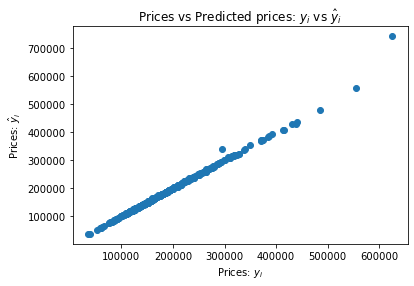

In [31]:
plt.scatter(y_test, y_pred_gbdt)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

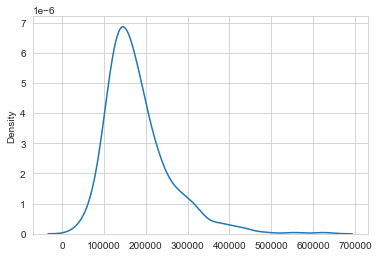

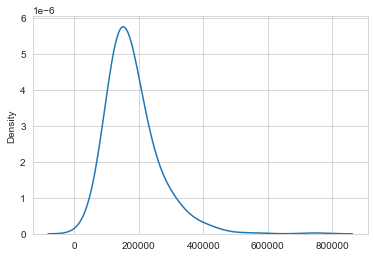

In [32]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_test))
plt.show()

sns.kdeplot(np.array(y_pred_gbdt),bw_method=0.5)
plt.show()

# Random Forest

In [33]:
regressor_rf = RandomForestRegressor(random_state = 23)
regressor_rf.fit(x_train, y_train)

RandomForestRegressor(random_state=23)

In [34]:
y_pred_rf = regressor_rf.predict(x_test)

In [35]:
y_pred_rf

array([184949.5 , 117008.  , 135005.  , 381507.08, 160958.19, 116920.  ,
       274965.2 , 142949.25, 189979.  , 159986.76, 382714.5 , 233951.4 ,
       309750.6 , 142970.77, 224843.  , 149396.  , 448755.07, 185244.5 ,
       250081.6 ,  93598.92, 161010.64, 165053.  , 130054.5 , 128976.  ,
       177987.6 , 162976.  , 184789.  , 115011.  , 215100.37, 167290.  ,
       140003.  , 230104.34, 154912.  , 140003.  , 135911.5 , 310034.12,
       239794.87, 153416.55, 120400.5 , 248537.62, 108408.27, 266415.93,
        75956.  ,  49062.86, 375737.68, 154999.7 , 124368.  , 193396.  ,
       349410.82, 154881.7 , 173909.9 , 315205.83, 184012.5 ,  60034.93,
       156873.05, 119594.  ,  55389.3 , 223953.  , 100282.76, 136536.  ,
        87222.84, 122900.  , 192080.  , 250185.34, 167951.4 , 184031.5 ,
       192706.  , 230135.92, 181184.72, 139938.  , 107835.85, 112040.  ,
       157893.66, 131978.  , 227055.1 , 124924.  , 176015.19, 157940.  ,
       139896.  , 212946.  , 371948.28, 112850.  , 

In [36]:
mse = mean_squared_error(y_test, y_pred_rf)
sqrt(mse)

3138.502354797816

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

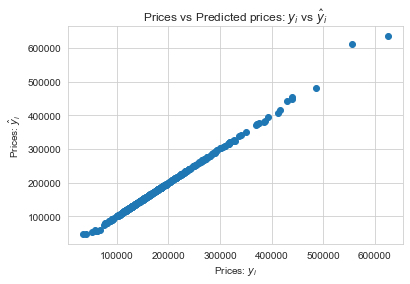

In [37]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

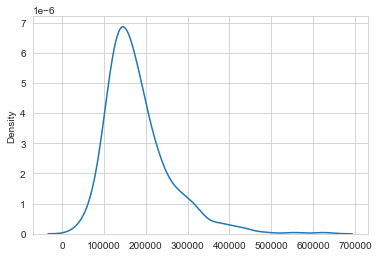

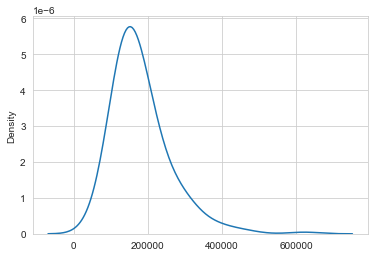

In [38]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_test))
plt.show()

sns.kdeplot(np.array(y_pred_rf),bw_method=0.5)
plt.show()

TRAIN TEST SPLIT 80-20 :

In [39]:
x_train1, x_test1, y_train1, y_test1 = tts(X, Y, test_size = 0.2, random_state = 42)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(1137, 173)
(285, 173)
(1137,)
(285,)


GBDT

In [40]:
classifier=xgboost.XGBRegressor()
classifier.fit(x_train1,y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
# Hyper Parameter Optimization
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [42]:
random_cv.fit(x_train1,y_train1)
random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   19.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  8.2min finished


[18:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.75, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
regressor_gbdt = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=1, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, subsample=1)
regressor_gbdt.fit(x_train1,y_train1)

# Saving as pickle file
filename = 'finalized_model.pk1'
pickle.dump(regressor_gbdt, open(filename,'wb'))

In [44]:
y_pred_gbdt1 = regressor_gbdt.predict(x_test1)

In [45]:
y_pred_gbdt1

array([185005.47 , 118136.71 , 135023.33 , 381332.4  , 163975.89 ,
       118524.67 , 274989.84 , 143480.28 , 190538.64 , 158139.38 ,
       386809.16 , 235580.03 , 314263.9  , 142475.   , 224902.77 ,
       147970.66 , 433929.34 , 185413.05 , 250475.28 ,  93120.23 ,
       164227.38 , 164788.08 , 129659.94 , 128751.83 , 176187.33 ,
       164138.14 , 184971.78 , 114114.234, 216601.8  , 165844.   ,
       139105.98 , 229671.77 , 154174.94 , 139058.75 , 134515.06 ,
       315229.12 , 241406.64 , 154251.83 , 121032.16 , 250574.11 ,
       108823.836, 268257.8  ,  76290.59 ,  37330.258, 373681.53 ,
       154911.17 , 125214.88 , 193641.88 , 353018.97 , 155039.19 ,
       173953.7  , 314836.03 , 183520.44 ,  65945.05 , 159001.03 ,
       119371.87 ,  60252.18 , 225766.95 , 100331.69 , 138675.4  ,
        85697.2  , 120695.984, 192988.34 , 251046.23 , 166028.48 ,
       183321.92 , 192478.97 , 228855.31 , 180454.66 , 139133.6  ,
       107719.664, 113458.41 , 158891.28 , 132478.84 , 226930.

In [46]:
mse = mean_squared_error(y_test1, y_pred_gbdt1)
sqrt(mse)

4212.215370967135

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

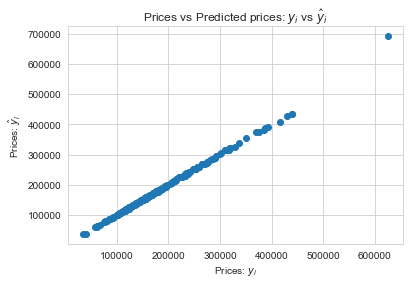

In [47]:
plt.scatter(y_test1, y_pred_gbdt1)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

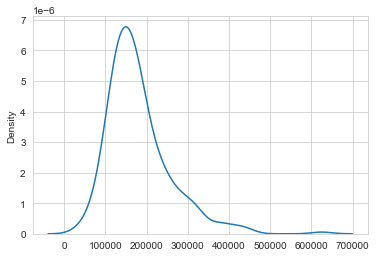

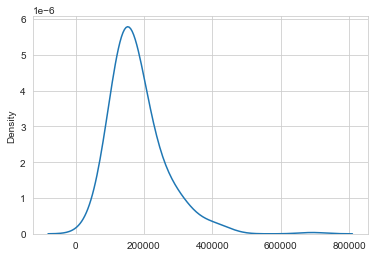

In [48]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_test1))
plt.show()

sns.kdeplot(np.array(y_pred_gbdt1),bw_method=0.5)
plt.show()

RANDOM FOREST

In [49]:
regressor_rf = RandomForestRegressor(random_state = 23)
regressor_rf.fit(x_train1, y_train1)

RandomForestRegressor(random_state=23)

In [50]:
y_pred_rf1 = regressor_rf.predict(x_test1)

In [51]:
y_pred_rf1

array([185019.5 , 116785.  , 134998.  , 380960.56, 160860.5 , 116775.5 ,
       274983.1 , 143001.  , 190019.5 , 159950.14, 384083.3 , 233275.2 ,
       309227.68, 143031.  , 224888.  , 149534.  , 443520.08, 185587.5 ,
       250078.98,  93671.  , 160960.45, 164994.8 , 129998.5 , 128978.  ,
       178119.25, 162972.  , 185183.  , 114915.6 , 215110.37, 167312.6 ,
       140015.  , 229976.92, 154984.  , 140016.  , 135935.95, 309567.79,
       239895.8 , 153439.45, 120370.  , 248802.44, 108577.33, 266616.22,
        76023.  ,  45769.72, 375696.08, 155053.05, 124447.  , 193130.  ,
       349776.54, 154973.35, 173911.6 , 314826.17, 183825.5 ,  63275.  ,
       156874.72, 119550.  ,  58829.58, 224027.  , 100056.  , 136595.7 ,
        87018.71, 122850.  , 192234.  , 249992.38, 168009.4 , 183758.  ,
       192787.  , 230102.74, 181001.7 , 139927.  , 107867.18, 112010.  ,
       157883.  , 131999.  , 226803.4 , 124980.75, 175995.72, 158028.  ,
       139913.  , 212819.3 , 371533.07, 112882.54, 

In [52]:
mse = mean_squared_error(y_test1, y_pred_rf1)
sqrt(mse)

1084.5796574312487

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

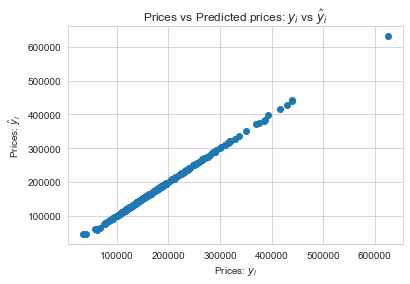

In [53]:
plt.scatter(y_test1, y_pred_rf1)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

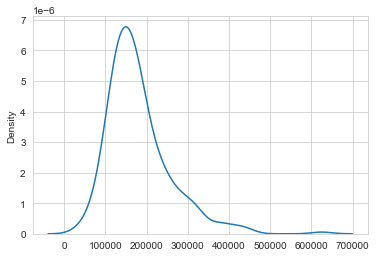

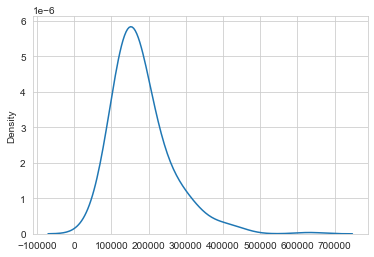

In [54]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_test1))
plt.show()

sns.kdeplot(np.array(y_pred_rf1),bw_method=0.5)
plt.show()

TRAIN TEST SPLIT 65-35

In [55]:
x_train2, x_test2, y_train2, y_test2 = tts(X, Y, test_size = 0.35, random_state = 42)
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(924, 173)
(498, 173)
(924,)
(498,)


GBDT

In [56]:
classifier=xgboost.XGBRegressor()
classifier.fit(x_train2,y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
# Hyper Parameter Optimization
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [58]:
random_cv.fit(x_train2,y_train2)
random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   14.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  7.7min finished


[18:36:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=1, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
regressor_gbdt = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=1, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, subsample=1)
regressor_gbdt.fit(x_train2,y_train2)

# Saving as pickle file
filename = 'finalized_model.pk1'
pickle.dump(regressor_gbdt, open(filename,'wb'))

In [60]:
y_pred_gbdt2 = regressor_gbdt.predict(x_test2)

In [61]:
y_pred_gbdt2

array([184452.6  , 118748.14 , 135962.33 , 385274.03 , 160936.56 ,
       117706.914, 275257.8  , 142812.05 , 190648.33 , 160454.66 ,
       386524.06 , 234835.58 , 305602.   , 143827.78 , 224473.47 ,
       148785.2  , 440299.97 , 186017.55 , 249628.31 ,  91228.41 ,
       160568.14 , 165154.56 , 130490.   , 130548.63 , 176941.77 ,
       162971.98 , 184770.1  , 113920.23 , 214022.7  , 169643.11 ,
       140163.5  , 229272.   , 155359.33 , 140579.75 , 135795.8  ,
       305698.84 , 240795.31 , 153821.08 , 120244.2  , 248556.62 ,
       108083.63 , 266639.4  ,  75728.87 ,  37869.516, 379327.94 ,
       154451.2  , 124363.76 , 194128.67 , 349758.88 , 156061.67 ,
       173143.27 , 315769.62 , 183664.52 ,  66526.12 , 155625.14 ,
       119084.945,  60625.555, 224109.86 , 100245.59 , 136342.75 ,
        87233.07 , 124528.31 , 192803.08 , 250231.55 , 169930.55 ,
       183995.89 , 192789.67 , 228079.14 , 181666.75 , 141013.55 ,
       108474.13 , 113204.48 , 157031.56 , 131652.7  , 227415.

In [62]:
mse = mean_squared_error(y_test2, y_pred_gbdt2)
sqrt(mse)

6302.694367666291

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

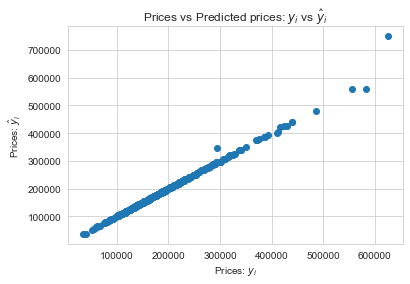

In [63]:
plt.scatter(y_test2, y_pred_gbdt2)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

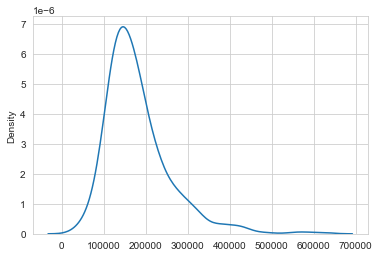

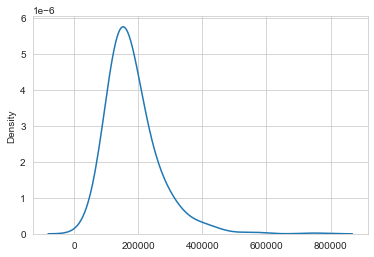

In [64]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_test2))
plt.show()

sns.kdeplot(np.array(y_pred_gbdt2),bw_method=0.5)
plt.show()

RANDOM FOREST

In [65]:
regressor_rf = RandomForestRegressor(random_state = 23)
regressor_rf.fit(x_train2, y_train2)

RandomForestRegressor(random_state=23)

In [66]:
y_pred_rf2 = regressor_rf.predict(x_test2)

In [67]:
y_pred_rf2 

array([185029.5 , 116772.5 , 135008.  , 380837.06, 160939.79, 116611.5 ,
       274992.95, 142894.  , 190079.5 , 159944.34, 385569.25, 233539.5 ,
       309383.58, 142911.25, 224808.8 , 149474.  , 447721.76, 185466.  ,
       250123.54,  93767.71, 161024.48, 164987.  , 130028.  , 128960.  ,
       178057.  , 163011.  , 184967.  , 115060.  , 215085.  , 167337.6 ,
       140025.  , 230032.48, 154978.  , 140021.  , 136024.5 , 309522.93,
       239777.89, 153378.96, 120302.5 , 248419.16, 108419.33, 266208.74,
        75547.  ,  51268.  , 377215.26, 154973.4 , 124466.  , 193373.  ,
       349547.07, 155046.1 , 173933.93, 314987.85, 183919.5 ,  59260.  ,
       156989.4 , 119546.5 ,  54458.  , 224244.8 , 100260.76, 136501.5 ,
        86769.  , 122915.  , 192100.  , 250090.76, 167901.2 , 184074.  ,
       192656.  , 229971.92, 181029.4 , 139949.  , 107793.26, 112050.  ,
       157808.96, 131891.5 , 227003.96, 124996.  , 175986.32, 157875.32,
       139899.  , 212850.  , 372689.  , 112865.  , 

In [68]:
mse = mean_squared_error(y_test2, y_pred_rf2)
sqrt(mse)

2505.5648294351527

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

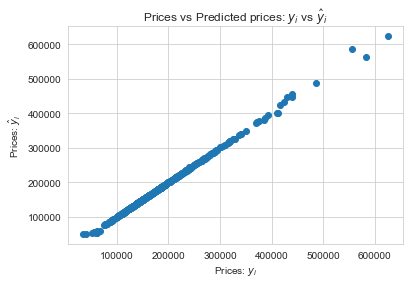

In [69]:
plt.scatter(y_test2, y_pred_rf2)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

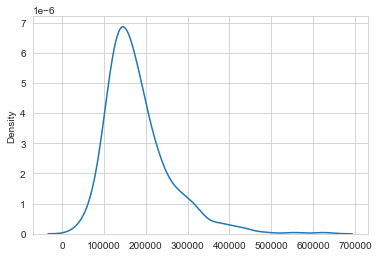

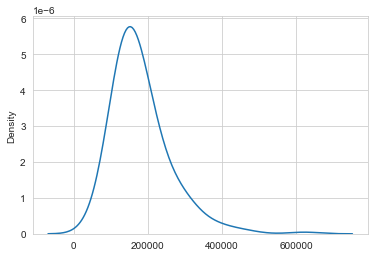

In [70]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_test))
plt.show()

sns.kdeplot(np.array(y_pred_rf), bw_method=0.5)
plt.show()

FEATURE EXTRACTION

In [3]:
shrink = df.copy()

NameError: name 'df' is not defined

In [2]:
cols = ["LotArea", "BedroomAbvGr", "FullBath", "MSSubClass", "PavedDrive", "PoolArea", "PoolQC", "BsmtQual", "Heating", "CentralAir", "MSZoning", "GarageCars"]

for col in list(shrink):
    if col not in cols:
        shrink.drop([col], axis=1, inplace=True)

NameError: name 'shrink' is not defined

In [73]:
one = [20,30,40,45,50,120,150]
two = [60,70,75,160]
multi = [80,85,90,180,190]

def stories_num(num):
    if num in one:
        return 'one'
    elif num in two:
        return 'two'
    else:
        return 'multi'

In [74]:
buff = shrink['MSSubClass']
stories = buff.map(stories_num)
shrink['stories'] = stories
del buff
del stories
shrink.drop(['MSSubClass'], axis=1, inplace=True)
shrink['SalePrice'] = df['SalePrice']

In [75]:
shrink[shrink['MSZoning'] == 'C (all)']

,MSZoning,LotArea,BsmtQual,Heating,CentralAir,FullBath,BedroomAbvGr,GarageCars,PavedDrive,PoolArea,stories,SalePrice
30,C (all),8500,TA,GasA,N,1,3,1,N,0,two,40000
88,C (all),8470,TA,GasA,N,1,2,0,N,0,one,85000
93,C (all),7200,TA,GasW,N,2,4,2,Y,0,multi,133900
495,C (all),7879,TA,GasA,N,1,2,0,N,0,one,34900
557,C (all),11040,TA,GasA,Y,1,3,1,Y,0,one,108000
711,C (all),8712,TA,GasA,Y,1,2,1,N,0,one,102776
812,C (all),8712,TA,GasA,N,1,2,2,N,0,one,55993
916,C (all),9000,TA,GasA,N,0,1,1,Y,0,one,35311
1061,C (all),18000,TA,GasA,Y,1,2,3,Y,0,one,81000
1279,C (all),7500,TA,GasA,Y,1,2,2,Y,0,one,68400


In [76]:
shrink['MSZoning'].value_counts()

RL         1118
RM          214
FV           65
RH           15
C (all)      10
Name: MSZoning, dtype: int64

In [77]:
rl = list(shrink[shrink['MSZoning'] == 'RL'].SalePrice.values)
rm = list(shrink[shrink['MSZoning'] == 'RM'].SalePrice.values)
fv = list(shrink[shrink['MSZoning'] == 'FV'].SalePrice.values)
rh = list(shrink[shrink['MSZoning'] == 'RH'].SalePrice.values)
c = list(shrink[shrink['MSZoning'] == 'C (all)'].SalePrice.values)
rl = np.array(rl)
rm = np.array(rm)
fv = np.array(fv)
rh = np.array(rh)
c = np.array(c)

In [78]:
print(rl.mean())
print(rm.mean())
print(fv.mean())
print(rh.mean())
print(c.mean())

193433.44543828265
127068.07943925234
214014.06153846154
130728.93333333333
74528.0


In [79]:
def area(x):
    if x == 'RH':
        return 'RM'
    elif x == 'RL':
        return 'RL'
    elif x == 'FV':
        return 'FV'
    elif x == 'C (all)':
        return 'C'
    
area_col = shrink['MSZoning']
temp = area_col.map(area)
shrink['Area'] = temp
del temp
del area_col
shrink.drop(['MSZoning'],axis=1, inplace=True)

In [80]:

shrink["Area"].value_counts()

RL    1118
FV      65
RM      15
C       10
Name: Area, dtype: int64

In [83]:
def is_pool(x):
    if x == 0:
        return 'no'
    else:
        return 'yes'
    
pool_col = shrink['PoolArea']
temp = pool_col.map(is_pool)
shrink['Pool'] = temp
del pool_col
del temp
shrink.drop(['PoolArea'], axis =1, inplace = True)

In [84]:
def pavement(x):
    if x == 'Y':
        return 'Y'
    elif x == 'N':
        return 'N'
    elif x == 'P':
        return 'Y'
    
pave_col = shrink['PavedDrive']
temp = pave_col.map(pavement)
shrink['Pavement'] = temp
del pave_col
del temp
shrink.drop(['PavedDrive'], axis =1, inplace = True)

In [85]:
shrink.BsmtQual.value_counts()

TA    649
Gd    617
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [86]:
ta = list(shrink[shrink['BsmtQual'] == 'TA'].SalePrice.values)
gd = list(shrink[shrink['BsmtQual'] == 'Gd'].SalePrice.values)
ex = list(shrink[shrink['BsmtQual'] == 'Ex'].SalePrice.values)
fa = list(shrink[shrink['BsmtQual'] == 'Fa'].SalePrice.values)

ta = np.array(ta)
gd = np.array(gd)
ex = np.array(ex)
fa = np.array(fa)

print(fa.mean())
print(ta.mean())
print(gd.mean())
print(ex.mean())

115692.02857142857
140759.81818181818
202745.51053484602
327041.04132231406


In [87]:
def base_qual(x):
    if x == 'Fa':
        return '1'
    elif x == 'TA':
        return '2'
    elif x == 'Gd':
        return '3'
    else:
        return '4'
    
base_col = shrink['BsmtQual']
temp = base_col.map(base_qual)
shrink['Basement'] = temp
del base_col
del temp
shrink.drop(['BsmtQual'], axis =1, inplace = True)

In [88]:
shrink['Basement'] = shrink['Basement'].astype(int)

In [89]:
def story(x):
    if x == 'one':
        return '1'
    elif x == 'two':
        return '2'
    elif x == 'multi':
        return '3'
    
story_col = shrink['stories']
temp = story_col.map(story)
shrink['Stories'] = temp
del story_col
del temp
shrink.drop(['stories'], axis =1, inplace = True)

In [90]:
shrink.CentralAir.value_counts()

Y    1341
N      81
Name: CentralAir, dtype: int64

In [91]:
shrink.head()

,LotArea,Heating,CentralAir,FullBath,BedroomAbvGr,GarageCars,SalePrice,Area,Pool,Pavement,Basement,Stories
0,8450,GasA,Y,2,3,2,208500,RL,no,Y,3,2
1,9600,GasA,Y,2,3,2,181500,RL,no,Y,3,1
2,11250,GasA,Y,2,3,2,223500,RL,no,Y,3,2
3,9550,GasA,Y,1,3,3,140000,RL,no,Y,2,2
4,14260,GasA,Y,2,4,3,250000,RL,no,Y,3,2


In [92]:
cleansed = shrink.copy()

In [93]:
cleansed

,LotArea,Heating,CentralAir,FullBath,BedroomAbvGr,GarageCars,SalePrice,Area,Pool,Pavement,Basement,Stories
0,8450,GasA,Y,2,3,2,208500,RL,no,Y,3,2
1,9600,GasA,Y,2,3,2,181500,RL,no,Y,3,1
2,11250,GasA,Y,2,3,2,223500,RL,no,Y,3,2
3,9550,GasA,Y,1,3,3,140000,RL,no,Y,2,2
4,14260,GasA,Y,2,4,3,250000,RL,no,Y,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,GasA,Y,2,3,2,175000,RL,no,Y,3,2
1456,13175,GasA,Y,2,3,2,210000,RL,no,Y,3,1
1457,9042,GasA,Y,2,4,1,266500,RL,no,Y,2,2
1458,9717,GasA,Y,1,2,1,142125,RL,no,Y,2,1


In [94]:
encoded = cleansed.copy()

In [95]:
encoded['Pavement'] = np.where(encoded['Pavement'].str.contains("Y"),1,0)
encoded['CentralAir'] = np.where(encoded['CentralAir'].str.contains("Y"),1,0)
encoded['Pool'] = np.where(encoded['Pool'].str.contains("yes"),1,0)

In [96]:
encoded.head()

,LotArea,Heating,CentralAir,FullBath,BedroomAbvGr,GarageCars,SalePrice,Area,Pool,Pavement,Basement,Stories
0,8450,GasA,1,2,3,2,208500,RL,0,1,3,2
1,9600,GasA,1,2,3,2,181500,RL,0,1,3,1
2,11250,GasA,1,2,3,2,223500,RL,0,1,3,2
3,9550,GasA,1,1,3,3,140000,RL,0,1,2,2
4,14260,GasA,1,2,4,3,250000,RL,0,1,3,2


In [97]:
dum_df = pd.get_dummies(encoded, columns=["Area", "Heating"], prefix=["Area", "Heating"])
# merge with main df bridge_df on key values
# encoded = encoded.join(dum_df)
dum_df

,LotArea,CentralAir,FullBath,BedroomAbvGr,GarageCars,SalePrice,Pool,Pavement,Basement,Stories,Area_C,Area_FV,Area_RL,Area_RM,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW
0,8450,1,2,3,2,208500,0,1,3,2,0,0,1,0,1,0,0,0
1,9600,1,2,3,2,181500,0,1,3,1,0,0,1,0,1,0,0,0
2,11250,1,2,3,2,223500,0,1,3,2,0,0,1,0,1,0,0,0
3,9550,1,1,3,3,140000,0,1,2,2,0,0,1,0,1,0,0,0
4,14260,1,2,4,3,250000,0,1,3,2,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,1,2,3,2,175000,0,1,3,2,0,0,1,0,1,0,0,0
1456,13175,1,2,3,2,210000,0,1,3,1,0,0,1,0,1,0,0,0
1457,9042,1,2,4,1,266500,0,1,2,2,0,0,1,0,1,0,0,0
1458,9717,1,1,2,1,142125,0,1,2,1,0,0,1,0,1,0,0,0


In [98]:
print(cleansed.shape)
print(dum_df.shape)

(1422, 12)
(1422, 18)


In [99]:
x = dum_df.drop(['SalePrice'], axis = 1)
y = dum_df['SalePrice']

In [100]:
for col in list(x):
    x[col] = pd.to_numeric(x[col])

In [102]:
x.drop(['Area_C'], inplace = True, axis = 1)

In [104]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [105]:
encoded["Area"] = encoded["Area"].astype(str)

In [108]:
le = LabelEncoder()
le.fit(encoded["Area"])
le_enc = le.transform(encoded["Area"])

In [109]:
encoded["Area"].value_counts()

2    1118
4     214
1      65
3      15
0      10
Name: Area, dtype: int64

In [110]:
le_enc = le_enc.reshape(len(le_enc), 1)

In [111]:
ohe = OneHotEncoder(drop='first')
ohe.fit(le_enc)
encoded["Area"] = ohe.transform(le_enc)

In [112]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1137, 16)
(285, 16)
(1137,)
(285,)


In [113]:
regressor_rf = RandomForestRegressor(random_state = 23)
regressor_rf.fit(x_train, y_train)

RandomForestRegressor(random_state=23)

In [114]:
y_pred_rf = regressor_rf.predict(x_test)

In [119]:
pickle.dump(regressor_rf,open('Random_model.pkl','wb'))